# SWMT controls

In [1]:
import intake
import glob

import cartopy.crs as ccrs
import cf_xarray as cfxr
import cmocean as cm
import dask.distributed
import gsw
import matplotlib.pyplot as plt
from matplotlib import gridspec 
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import pdb
import os
import pathlib
import shutil

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
#Starting a dask client
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client
client = Client(threads_per_worker = 1)

## Creating the map files

- Pan01 max = 7.9434912 Sv
   - 75% of this is 5.9576184 Sv, which corresponds to 27.71
- Pan005 max = 7.64575539 Sv
   - 75% of this is 5.7343165425 Sv, which corresponds to 27.69
- ACCESS max = 8.97311414 Sv
   - 75% of this is 6.729835605 Sv, which corresponds to 27.77

In [ ]:
# Importing the saved files
salt_files_C = np.sort(glob.glob('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/binned_salt_trans_access_C_*'))
heat_files_C = np.sort(glob.glob('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/binned_heat_trans_access_C_*'))

In [39]:
salt_tr_C = xr.open_mfdataset(salt_files_C, concat_dim='time', combine='nested', chunks={'time': 1, 'yt_ocean': 100, 'xt_ocean': 100})
heat_tr_C = xr.open_mfdataset(heat_files_C, concat_dim='time', combine='nested', chunks={'time': 1, 'yt_ocean': 100, 'xt_ocean': 100})
salt_tr_C = salt_tr_C.to_array().squeeze()
heat_tr_C = heat_tr_C.to_array().squeeze()

In [40]:
net_tr_C = salt_tr_C + heat_tr_C

In [41]:
depth = xr.open_dataset('/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_21mbath/output012/ocean/ocean_grid.nc')['ht']

In [42]:
swmt_shelf_sum_ave_C = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/plots/swmt_shelf_sum_ave_C_access_rho0.nc')

In [44]:
transformation_density = 27.77
shelf_subduction_plot_C = net_tr_C.sel(isopycnal_bins = transformation_density, method = 'nearest') * 1e5
swmt_xt_C = depth.cf['X']
swmt_yt_C = depth.cf['Y']

In [45]:
shelf_subduction_plot_C = shelf_subduction_plot_C.astype('float32').compute()

In [46]:
shelf_subduction_plot_C_map = shelf_subduction_plot_C.mean(dim='time')

In [47]:
shelf_subduction_plot_C_map.to_netcdf('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/plots/swmt_shelf_map_rho0_C_prescribed_access_denser_2.nc')

In [43]:
swmt_prof_3.sel(isopycnal_bins=27.78,method='nearest').load()

<xarray.DataArray ()> Size: 8B
array(6.26775034)
Coordinates:
    isopycnal_bins  float64 8B 27.79
    st_ocean        float64 8B 0.5413
Attributes:
    units:    Sv

## SWMT profile

In [3]:
# Pan01
swmt_prof_1 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/swmt_shelf_sum_ave_rho0_C_pan01.nc')
heat_prof_1 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/heat_shelf_sum_ave_rho0_C_pan01.nc')
salt_prof_1 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/salt_shelf_sum_ave_rho0_C_pan01.nc')

# Pan005
swmt_prof_2 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan005_SWMT_shelf_rho0/plots/swmt_shelf_sum_ave_C_pan005.nc')
heat_prof_2 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/heat_shelf_sum_ave_rho0_C_pan005.nc')
salt_prof_2 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan005_SWMT_shelf_rho0/plots/salt_shelf_sum_ave_rho0_C_pan005.nc')

# ACCESS
swmt_prof_3 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/plots/swmt_shelf_sum_ave_C_access_rho0.nc')
heat_prof_3 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/heat_shelf_sum_ave_rho0_C_prescribed_access.nc')
salt_prof_3 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/salt_shelf_sum_ave_rho0_C_prescribed_access.nc')

In [4]:
# Maps
subduction_plot_pan01 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/swmt_shelf_sum_map_rho0_C_pan01_denser_2.nc')
subduction_plot_pan005 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan005_SWMT_shelf_rho0/plots/swmt_shelf_sum_map_C_pan005_denser.nc')
subduction_plot_acc = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/plots/swmt_shelf_map_rho0_C_prescribed_access_denser_2.nc')

In [5]:
# Age
age_1 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/bottom_age_map_control_Pan01.nc')
age_2 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/bottom_age_map_control_Pan005.nc') 
age_3 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/bottom_age_map_control_access.nc')

In [6]:
# Shelf mask

def shelf_mask_isobath(var, model_dict):

    paths = {
             "mom5": "/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz",
             "mom6_01": "/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_01deg.nc",
            "mom6_005": "/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_005deg.nc"
             }

    var = var.cf.sel({'latitude': slice(-90, -59)})

    if paths[model_dict][-3:] == '.nc':
        shelf_mask = xr.open_dataset(paths[model_dict])['contour_masked_above']
    else:
        contour_file = np.load(paths[model_dict])
        shelf_mask = xr.DataArray(contour_file['contour_masked_above'],
                                  coords = var.coords, 
                                  dims = var.dims,
                                  name = 'contour_masked_above')
    
    shelf_mask = xr.where(shelf_mask == 0, 1, 0)
    masked_var = var * shelf_mask
    
    return masked_var, shelf_mask

In [7]:
# Land and contour data
depth_1 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/output050/20050501.ocean_static.nc')['deptho']
land_mask_1 = (0 * depth_1).fillna(1)
land_1 = xr.where(np.isnan(depth_1.rename('land_1')), 1, np.nan)

depth_2 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-005-zstar-ACCESSyr2/output030/19930701.ocean_static.nc')['deptho']
land_mask_2 = (0 * depth_2).fillna(1)
land_2 = xr.where(np.isnan(depth_2.rename('land_2')), 1, np.nan)

depth_3 = xr.open_dataset('/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_21mbath/output012/ocean/ocean_grid.nc')['ht']
land_mask_3 = (0 * depth_3).fillna(1)
land_3 = xr.where(np.isnan(depth_3.rename('land_3')), 1, np.nan)

shelf_contour_1, shelf_mask_1 = shelf_mask_isobath(depth_1, 'mom6_01')
shelf_contour_2, shelf_mask_2 = shelf_mask_isobath(depth_2, 'mom6_005')
shelf_contour_3, shelf_mask_3 = shelf_mask_isobath(depth_3, 'mom5')

In [8]:
# 25-75% limits
pan01_25 = 27.89
pan01_75 = 27.73 

acc_25 = 27.93
acc_75 = 27.79

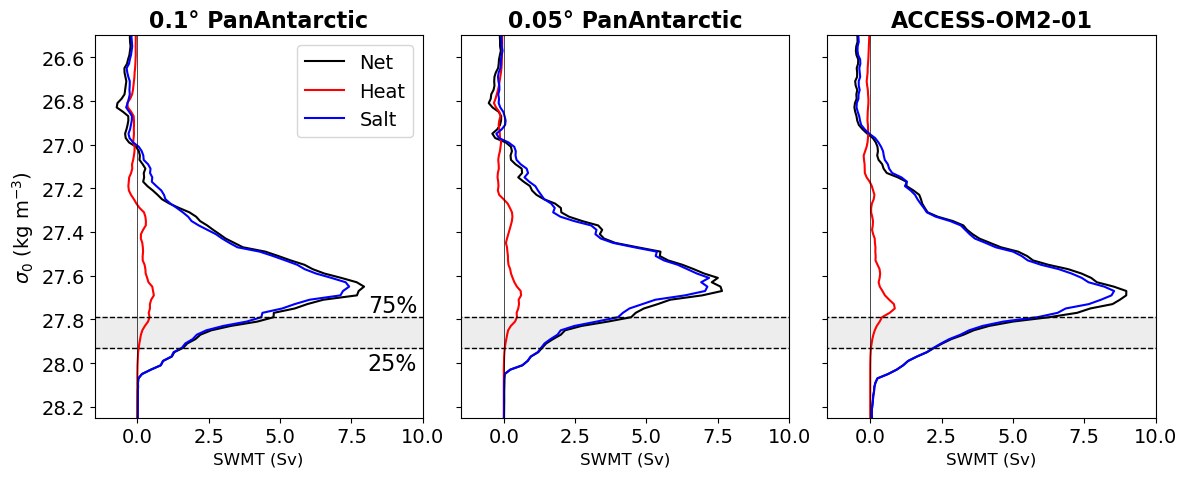

In [61]:
plt.rcParams['font.size'] = 14

profiles = {
    "0.1° PanAntarctic": (swmt_prof_1, heat_prof_1, salt_prof_1),
    "0.05° PanAntarctic": (swmt_prof_2, heat_prof_2, salt_prof_2),
    "ACCESS-OM2-01": (swmt_prof_3, heat_prof_3, salt_prof_3),
}

# --- Figure setup ---
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True)

for ax, (title, (swmt, heat, salt)) in zip(axes, profiles.items()):
    ax.plot(swmt, swmt['isopycnal_bins'], color='k', label='Net')
    ax.plot(heat, heat['isopycnal_bins'], color='r', label='Heat')
    ax.plot(salt, salt['isopycnal_bins'], color='b', label='Salt')
    ax.plot([0, 0], [28.25, 26.5], 'k', linewidth=0.5)
    ax.plot([-5, 15], [acc_25, acc_25], 'k--', linewidth=1)
    ax.plot([-5, 15], [acc_75, acc_75], 'k--', linewidth=1)
    
    # --- Shading between them ---
    ax.fill_betweenx(
        y=[acc_25, acc_75],
        x1=-3, x2=10,                 # match your x-limits
        color='lightgray', alpha=0.4, zorder=0
    )

    ax.set_ylim(28.25, 26.5)
    ax.set_xlim(-1.5, 10)
    ax.set_title(title, fontsize=16,fontweight='bold')
    ax.set_xlabel('SWMT (Sv)', fontsize=12)

# Shared y-label
axes[0].set_ylabel(r'$\sigma_0$ (kg m$^{-3}$)', fontsize=14)

# Add text labels for 25% and 75%
axes[0].text(9.8, acc_25 + 0.125, '25%', ha='right', va='bottom', fontsize=16)
axes[0].text(9.8, acc_75 + 0.001, '75%', ha='right', va='bottom', fontsize=16)

# Put legend only on first panel
axes[0].legend(loc=1, fontsize=14)

plt.tight_layout()
plt.show()

fig.savefig("/g/data/g40/kc5856/thesis_figures/validation_swmt_profiles.png", dpi=300, bbox_inches='tight')

(28.25, 26.5)

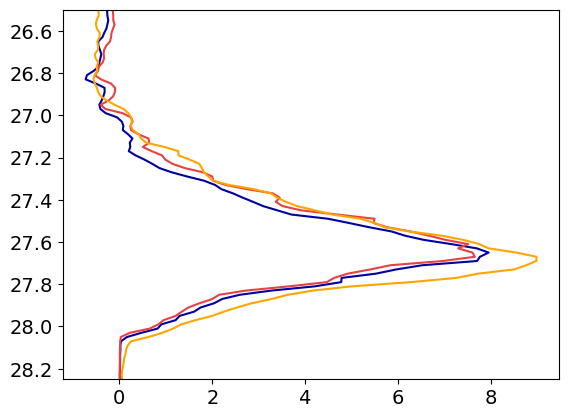

In [50]:
plt.plot(swmt_prof_1, swmt_prof_1['isopycnal_bins'], color=colors['Control_pan01'], label='0.1° PanAnt.')
plt.plot(swmt_prof_2, swmt_prof_2['isopycnal_bins'], color=colors['Control_pan005'], label='0.05° PanAnt.')
plt.plot(swmt_prof_3, swmt_prof_3['isopycnal_bins'], color=colors['Control_access'], label='ACCESS-OM2-01')
plt.ylim(28.25, 26.5)

In [51]:
acc_25 = 27.93
acc_75 = 27.79

In [57]:
print('0.1 PanAnt Cont =', swmt_prof_1.sel(isopycnal_bins=slice(acc_75,acc_25)).mean().load().item(),
      '\n0.05 PanAnt Cont =', swmt_prof_2.sel(isopycnal_bins=slice(acc_75,acc_25)).mean().load().item(),
      '\nACCESS Cont =', swmt_prof_3.sel(isopycnal_bins=slice(acc_75,acc_25)).mean().load().item()
     )

0.1 PanAnt Cont = 2.5240352753517064 
0.05 PanAnt Cont = 2.1525522959517054 
ACCESS Cont = 3.3827439669391346


In [44]:
swmt_prof_2.sel(isopycnal_bins=27.71,method='nearest').load()

<xarray.DataArray ()> Size: 8B
array(5.83085573)
Coordinates:
    isopycnal_bins  float64 8B 27.71
    z_l             float64 8B 0.5413
Attributes:
    units:    Sv

In [9]:
def standardize_coords(da):
    if "xh" in da.dims and "yh" in da.dims:
        return da.rename({"xh": "lon", "yh": "lat"})
    elif "xt_ocean" in da.dims and "yt_ocean" in da.dims:
        return da.rename({"xt_ocean": "lon", "yt_ocean": "lat"})
    return da


In [10]:
subduction_plot_pan01_shelf = subduction_plot_pan01.where(shelf_mask_1 ==1).load()
subduction_plot_pan005_shelf = subduction_plot_pan005.where(shelf_mask_2 ==1).load()
subduction_plot_acc_shelf = subduction_plot_acc.where(shelf_mask_3 ==1).load()

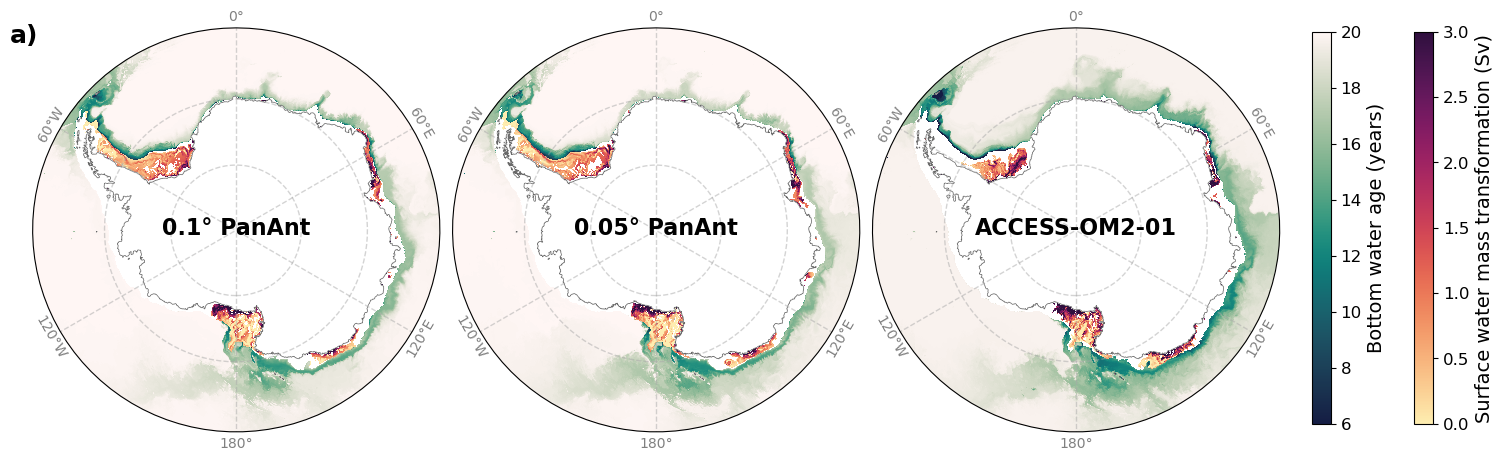

In [48]:
plt.rcParams['font.size'] = 16

# Projection
projection = ccrs.SouthPolarStereo()

# Figure with 2 subplots side by side
fig, axes = plt.subplots(
    nrows=1, ncols=3,
    subplot_kw={"projection": projection},
    figsize=(12.8, 5.6),
    constrained_layout=True
)

# Shared circle boundary
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.495], 0.495
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# Datasets, land masks, shelf masks, and titles
land_masks = [land_1, land_2, land_3]
land_contours = [land_mask_1, land_mask_2, land_mask_3]
shelf_masks = [shelf_mask_1, shelf_mask_2, shelf_mask_3]
titles = ["0.1° PanAnt", "0.05° PanAnt", "ACCESS-OM2-01"]

# Normalised coordinates
age_datasets = [standardize_coords(age_1), 
                standardize_coords(age_2), 
                standardize_coords(age_3)]
swmt_datasets = [standardize_coords(subduction_plot_pan01_shelf), 
                standardize_coords(subduction_plot_pan005_shelf), 
                standardize_coords(subduction_plot_acc_shelf)]

# Longitude label settings for rotation
label_lon = ['0°', '180°', '60°E', '120°W', '120°E', '60°W']
rot_lon = [0, 0, -60, -60, 60, 60]
lat_lon_label = [-58, -58, -58, -58, -58, -58]

# Loop over subplots
for i, (ax, age_data, swmt_data, land_m, land_contour, shelf_m, title) in enumerate(zip(
        axes, age_datasets, swmt_datasets, land_masks, land_contours, shelf_masks, titles)):

    ax.set_extent([-280, 80, -80, -59], crs=ccrs.PlateCarree())
    ax.set_boundary(circle, transform=ax.transAxes)

    # Filled land
    land_m.plot.contourf(ax=ax, colors='white',
                         zorder=2, transform=ccrs.PlateCarree(),
                         add_colorbar=False)

    # Coast line
    ax.contour(land_contour.cf['X'], land_contour.cf['Y'], land_contour,
               levels=[0, 1], colors='dimgrey', linewidths=0.5,
               transform=ccrs.PlateCarree())

    # Gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=1, xlocs=range(-180, 171, 60), ylocs=[],
                      color='darkgray', alpha=0.5, linestyle='--', zorder=10)
    gl2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                       linewidth=1, xlocs=[], ylocs=(-80, -70, -55),
                       color='darkgray', alpha=0.5, linestyle='--', zorder=10)

    # Manually rotate longitude labels
    for j, position in enumerate([0, 180, 60, -120, 120, -60]):
        ax.text(position, lat_lon_label[j], label_lon[j], rotation=rot_lon[j],
                ha='center', va='center', color='gray', fontsize=10,
                transform=ccrs.PlateCarree())

    # Plot dataset
    im_age = age_data.plot(
        x="lon", y="lat",
        transform=ccrs.PlateCarree(),
        vmin=6, vmax=20,
        extend="both",
        cmap=cm.cm.tempo.reversed(),
        add_colorbar=False,
        ax=ax,
    )

    # Shelf as filled white region
    ax.pcolormesh(
        shelf_m.cf["X"], shelf_m.cf["Y"],
        shelf_m.values,   # just the raw array
        cmap=mcolors.ListedColormap(["none", "white"]),
        vmin=0, vmax=1,
        transform=ccrs.PlateCarree(),
        #zorder=3
    )
    
    im_swmt = swmt_data.plot(
        x="lon", y="lat",
        transform=ccrs.PlateCarree(),
        vmin=0, vmax=3,
        extend="both",
        cmap=cm.cm.matter,
        add_colorbar=False,
        ax=ax,
    )

    # Set title
    ax.set_title("", fontsize=14, pad=25)
    ax.text(
        0.5, 0.5,
        title,
        transform=ax.transAxes,
        fontsize=16,
        weight="bold",
        ha="center", va="center",
    )

    # # Add subplot label (a), (b), (c).
    # ax.text(0.01,1, f'{chr(97+i)})', transform=ax.transAxes,
    #         fontsize=16, fontweight='bold', va='top', ha='left', color='black')

axes[0].text(-0.05, 1, 'a)', transform=axes[0].transAxes,
             fontsize=18, fontweight='bold', va='top', ha='left', color='black')

# Add shared colorbars below all subplots
cbar_ax1 = fig.add_axes([1.02, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
cbar_ax2 = fig.add_axes([1.1, 0.15, 0.015, 0.7])

# Create the colorbars
cbar1 = fig.colorbar(im_age, cax=cbar_ax1, orientation='vertical')
cbar1.set_label("Bottom water age (years)", fontsize=14)  # set label fontsize
cbar1.ax.tick_params(labelsize=12)                        # set tick fontsize

cbar2 = fig.colorbar(im_swmt, cax=cbar_ax2, orientation='vertical')
cbar2.set_label("Surface water mass transformation (Sv)", fontsize=14)
cbar2.ax.tick_params(labelsize=12)

plt.show()

fig.savefig("/g/data/g40/kc5856/thesis_figures/validation_swmt_maps_denser.png", dpi=300, bbox_inches='tight')

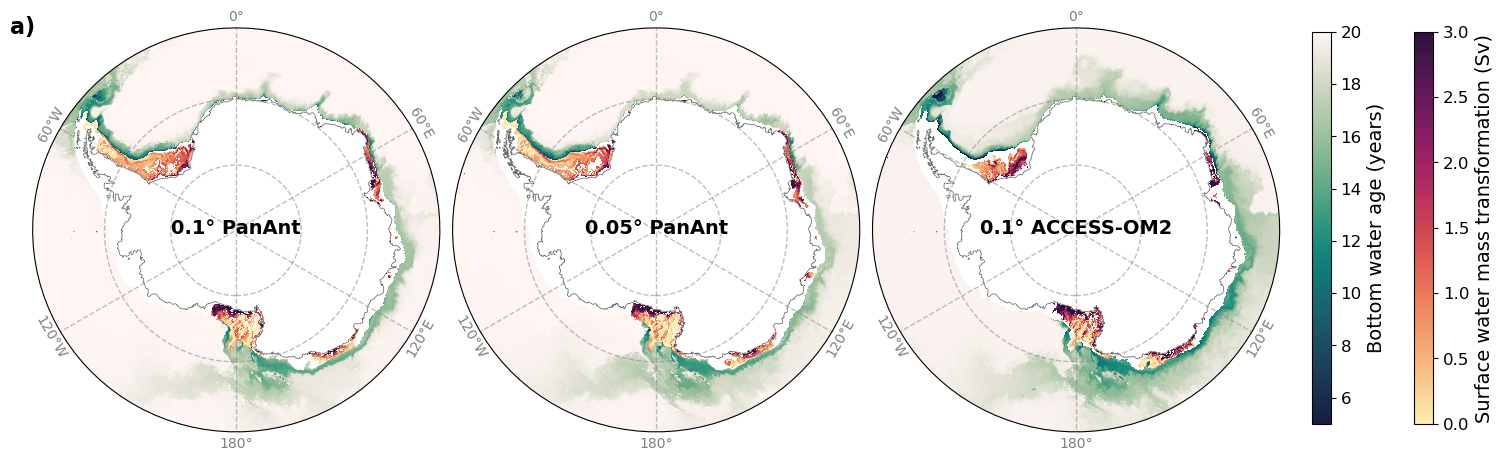

In [39]:
# plt.rcParams['font.size'] = 16

# # Projection
# projection = ccrs.SouthPolarStereo()

# # Figure with 2 subplots side by side
# fig, axes = plt.subplots(
#     nrows=1, ncols=3,
#     subplot_kw={"projection": projection},
#     figsize=(12.8, 5.6),
#     constrained_layout=True
# )

# # Shared circle boundary
# theta = np.linspace(0, 2 * np.pi, 100)
# center, radius = [0.5, 0.495], 0.495
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
# circle = mpath.Path(verts * radius + center)

# # Datasets, land masks, shelf masks, and titles
# land_masks = [land_1, land_2, land_3]
# land_contours = [land_mask_1, land_mask_2, land_mask_3]
# shelf_masks = [shelf_mask_1, shelf_mask_2, shelf_mask_3]
# titles = ["0.1° PanAnt", "0.05° PanAnt", "0.1° ACCESS-OM2"]

# # Normalised coordinates
# age_datasets = [standardize_coords(age_1), 
#                 standardize_coords(age_2), 
#                 standardize_coords(age_3)]
# swmt_datasets = [standardize_coords(subduction_plot_pan01_shelf), 
#                 standardize_coords(subduction_plot_pan005_shelf), 
#                 standardize_coords(subduction_plot_acc_shelf)]

# # Longitude label settings for rotation
# label_lon = ['0°', '180°', '60°E', '120°W', '120°E', '60°W']
# rot_lon = [0, 0, -60, -60, 60, 60]
# lat_lon_label = [-58, -58, -58, -58, -58, -58]

# # Loop over subplots
# for i, (ax, age_data, swmt_data, land_m, land_contour, shelf_m, title) in enumerate(zip(
#         axes, age_datasets, swmt_datasets, land_masks, land_contours, shelf_masks, titles)):

#     ax.set_extent([-280, 80, -80, -59], crs=ccrs.PlateCarree())
#     ax.set_boundary(circle, transform=ax.transAxes)

#     # Filled land
#     land_m.plot.contourf(ax=ax, colors='white',
#                          zorder=2, transform=ccrs.PlateCarree(),
#                          add_colorbar=False)

#     # Coast line
#     ax.contour(land_contour.cf['X'], land_contour.cf['Y'], land_contour,
#                levels=[0, 1], colors='dimgrey', linewidths=0.5,
#                transform=ccrs.PlateCarree())

#     # Gridlines
#     gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
#                       linewidth=1, xlocs=range(-180, 171, 60), ylocs=[],
#                       color='gray', alpha=0.5, linestyle='--', zorder=10)
#     gl2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
#                        linewidth=1, xlocs=[], ylocs=(-80, -70, -55),
#                        color='gray', alpha=0.5, linestyle='--', zorder=10)

#     # Manually rotate longitude labels
#     for j, position in enumerate([0, 180, 60, -120, 120, -60]):
#         ax.text(position, lat_lon_label[j], label_lon[j], rotation=rot_lon[j],
#                 ha='center', va='center', color='gray', fontsize=10,
#                 transform=ccrs.PlateCarree())

#     # Plot dataset
#     im_age = age_data.plot(
#         x="lon", y="lat",
#         transform=ccrs.PlateCarree(),
#         vmin=5, vmax=20,
#         extend="both",
#         cmap=cm.cm.tempo.reversed(),
#         add_colorbar=False,
#         ax=ax,
#     )

#     # Shelf as filled white region
#     ax.pcolormesh(
#         shelf_m.cf["X"], shelf_m.cf["Y"],
#         shelf_m.values,   # just the raw array
#         cmap=mcolors.ListedColormap(["none", "white"]),
#         vmin=0, vmax=1,
#         transform=ccrs.PlateCarree(),
#         #zorder=3
#     )
    
#     im_swmt = swmt_data.plot(
#         x="lon", y="lat",
#         transform=ccrs.PlateCarree(),
#         vmin=0, vmax=3,
#         extend="both",
#         cmap=cm.cm.matter,
#         add_colorbar=False,
#         ax=ax,
#     )

#     # Set title
#     ax.set_title("", fontsize=14, pad=25)
#     ax.text(
#         0.5, 0.5,
#         title,
#         transform=ax.transAxes,
#         fontsize=14,
#         weight="bold",
#         ha="center", va="center",
#     )

#     # # Add subplot label (a), (b), (c).
#     # ax.text(0.01,1, f'{chr(97+i)})', transform=ax.transAxes,
#     #         fontsize=16, fontweight='bold', va='top', ha='left', color='black')

# axes[0].text(-0.05, 1.02, 'a)', transform=axes[0].transAxes,
#              fontsize=16, fontweight='bold', va='top', ha='left', color='black')

# # Add shared colorbars below all subplots
# cbar_ax1 = fig.add_axes([1.02, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
# cbar_ax2 = fig.add_axes([1.1, 0.15, 0.015, 0.7])

# # Create the colorbars
# cbar1 = fig.colorbar(im_age, cax=cbar_ax1, orientation='vertical')
# cbar1.set_label("Bottom water age (years)", fontsize=14)  # set label fontsize
# cbar1.ax.tick_params(labelsize=12)                        # set tick fontsize

# cbar2 = fig.colorbar(im_swmt, cax=cbar_ax2, orientation='vertical')
# cbar2.set_label("Surface water mass transformation (Sv)", fontsize=14)
# cbar2.ax.tick_params(labelsize=12)

# plt.show()

# fig.savefig("/g/data/g40/kc5856/thesis_figures/validation_swmt_maps.png", dpi=300, bbox_inches='tight')

# Regional profiles

In [13]:
# Open data
save_dir_01 = '/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan01_SWMT_shelf_rho0/plots/'
save_dir_005 = '/g/data/g40/kc5856/access_panan_ssp126_SWMT/old_Pan005_SWMT_shelf_rho0/plots/'
save_dir_acc = '/g/data/g40/kc5856/access_panan_ssp126_SWMT/new_ACCESS_SWMT_shelf_rho0/plots/'

Adélie_01_C_map = xr.open_dataset(save_dir_01 + 'swmt_shelf_sum_ave_C_form_Adelie_pan01.nc').to_array().squeeze()
Adélie_005_C_map = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_ave_C_form_Adelie_pan005.nc').to_array().squeeze()
Adélie_ac_C_map = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_ave_C_form_Adelie_prescribed_access.nc').to_array().squeeze()

Weddell_01_C_map = xr.open_dataset(save_dir_01 + 'swmt_shelf_sum_ave_C_form_Weddell_pan01.nc').to_array().squeeze()
Weddell_005_C_map = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_ave_C_form_Weddell_pan005.nc').to_array().squeeze()
Weddell_ac_C_map = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_ave_C_form_Weddell_prescribed_access.nc').to_array().squeeze()

Prydz_01_C_map = xr.open_dataset(save_dir_01 + 'swmt_shelf_sum_ave_C_form_Prydz_pan01.nc').to_array().squeeze()
Prydz_005_C_map = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_ave_C_form_Prydz_pan005.nc').to_array().squeeze()
Prydz_ac_C_map = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_ave_C_form_Prydz_prescribed_access.nc').to_array().squeeze()

Ross_01_C_map = xr.open_dataset(save_dir_01 + 'swmt_shelf_sum_ave_C_form_Ross_pan01.nc').to_array().squeeze()
Ross_005_C_map = xr.open_dataset(save_dir_005 + 'swmt_shelf_sum_ave_C_form_Ross_pan005.nc').to_array().squeeze()
Ross_ac_C_map = xr.open_dataset(save_dir_acc + 'swmt_shelf_sum_ave_C_form_Ross_prescribed_access.nc').to_array().squeeze()

In [14]:
# ---- DATA ----
controls_01 = [Adélie_01_C_map, Ross_01_C_map, Weddell_01_C_map, Prydz_01_C_map]
controls_005 = [Adélie_005_C_map, Ross_005_C_map, Weddell_005_C_map, Prydz_005_C_map]
controls_ac = [Adélie_ac_C_map, Ross_ac_C_map, Weddell_ac_C_map, Prydz_ac_C_map]

colors = {'Control_pan01': '#0000a2',
          'Control_pan005': '#E84141',
          'Control_access': 'orange'}

titles = ["Adélie", "Ross", "Weddell", "Prydz"]

In [15]:
# Regional thresholds
# Thresholds from pan01 regional data
Ad_25 = 27.77
Ad_75 = 27.71

Ro_25 = 28.03
Ro_75 = 27.95

We_25 = 27.85
We_75 = 27.81

Pr_25 = 27.77
Pr_75 = 27.73

# 25th percentile for each region
p25_list = [Ad_25, Ro_25, We_25, Pr_25]

# 75th percentile for each region
p75_list = [Ad_75, Ro_75, We_75, Pr_75]

In [16]:
# ACCESS thresohlds
Ad_25 = 27.87
Ad_75 = 27.79

Ro_25 = 28.05
Ro_75 = 27.95

We_25 = 27.85
We_75 = 27.81

Pr_25 = 27.85
Pr_75 = 27.75

# 25th percentile for each region
p25_list = [Ad_25, Ro_25, We_25, Pr_25]

# 75th percentile for each region
p75_list = [Ad_75, Ro_75, We_75, Pr_75]

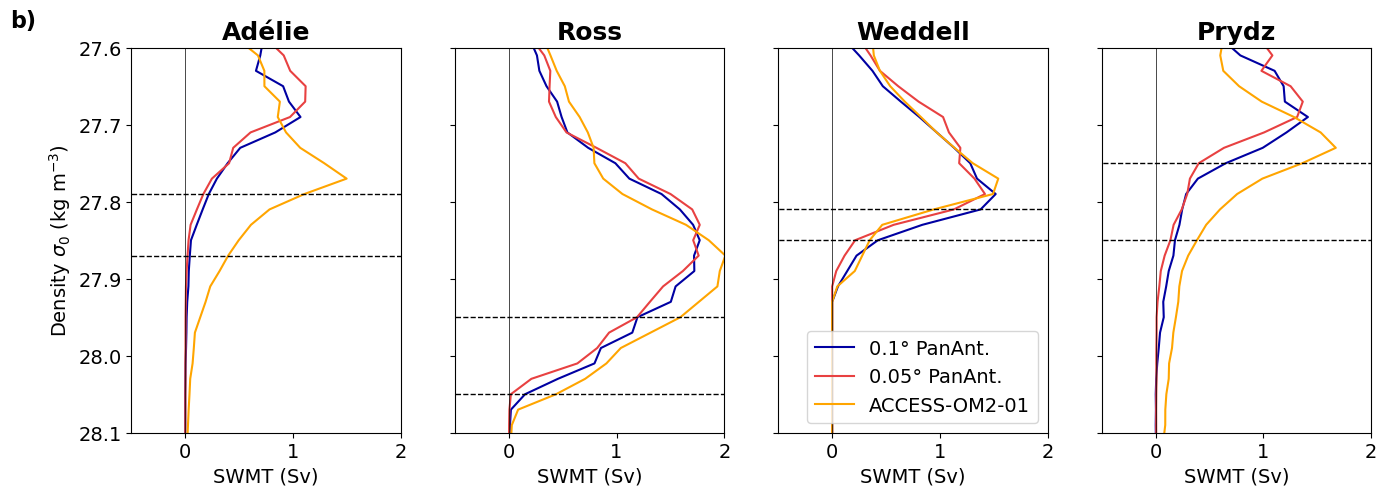

In [45]:
plt.rcParams['font.size'] = 14

titles = ["Adélie", "Ross", "Weddell", "Prydz"]

# ---- FIGURE ----
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5), sharey=True)

for j, title in enumerate(titles):
    # --- Row 1: 1/10 Control vs Melt ---
    ax = axes[j]
    ax.plot(controls_01[j], controls_01[j]['isopycnal_bins'], color=colors['Control_pan01'], label='0.1° PanAnt.')
    ax.plot(controls_005[j], controls_005[j]['isopycnal_bins'], color=colors['Control_pan005'], label='0.05° PanAnt.')
    ax.plot(controls_ac[j], controls_ac[j]['isopycnal_bins'], color=colors['Control_access'], label='ACCESS-OM2-01')
    ax.plot([0, 0], [26.5, 28.48], 'k', linewidth=0.5)
    ax.plot([-5, 15], [p25_list[j], p25_list[j]], 'k--', linewidth=1)
    ax.plot([-5, 15], [p75_list[j], p75_list[j]], 'k--', linewidth=1)
    ax.set_ylim((28.1, 27.6))
    ax.set_xlim((-0.5, 2))
    ax.set_title(title, fontsize=18,fontweight='bold')
    # hide x labels for first row
    ax.set_xlabel('SWMT (Sv)')
    ax.tick_params(labelbottom=True)

axes[0].text(-0.45, 1.1, 'b)', transform=axes[0].transAxes,
             fontsize=16, fontweight='bold', va='top', ha='left', color='black')
axes[0].set_ylabel('Density $\sigma_0$ (kg m$^{-3}$)')
axes[2].legend(loc='lower right')

#plt.tight_layout()
plt.show()
fig.savefig("/g/data/g40/kc5856/thesis_figures/validation_swmt_regional_profiles.png", dpi=300, bbox_inches='tight')